In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

from sklearn.metrics import plot_confusion_matrix

df = pd.read_csv("Double_annotated_csv.csv", encoding = 'cp1252')

In [13]:
df.head()

,Stanislav label,Kairit label,text,Unnamed: 3,Unnamed: 4
0,Catastrophizing,Not distorted,something that i have been noticing recently i...,NaN,NaN
1,Catastrophizing,Jumping to conclusion,i went on vacation and just got back yesterday...,NaN,NaN
2,Not distorted,Not distorted,i feel like confusion is a huge part to depres...,NaN,NaN
3,Emotional reasoning,Over-generalization,i don't know what i am. i'm just empty. i don'...,NaN,NaN
4,Catastrophizing,Not distorted,i want to fall in love. i'm in my early 20s an...,NaN,NaN


In [14]:
df = df.drop(['Unnamed: 3', 'Unnamed: 4'], axis=1)

In [15]:
bin_label_list_Kairit = []
bin_label_list_Stanislav = []

temp_list_K = df['Kairit label'].to_list()
temp_list_S = df['Stanislav label'].to_list()

for i in temp_list_K:
    if (i == 'Not distorted'):
        bin_label_list_Kairit.append('Not distorted') #'Not distored'
    else:
        bin_label_list_Kairit.append('Distored') #'Distored'
        
for i in temp_list_S:
    if (i == 'Not distorted'):
        bin_label_list_Stanislav.append('Not distorted') #'Not distored'
    else:
        bin_label_list_Stanislav.append('Distorted') #'Distored'

df['bin_sentiment_Kairit'] = bin_label_list_Kairit 
df['bin_sentiment_Stanislav'] = bin_label_list_Stanislav

In [16]:
df['bin_sentiment_Kairit'].value_counts()

Distored         158
Not distorted    143
Name: bin_sentiment_Kairit, dtype: int64

In [17]:
df['bin_sentiment_Stanislav'].value_counts()

Distorted        186
Not distorted    115
Name: bin_sentiment_Stanislav, dtype: int64

In [18]:
df['Stanislav label'].value_counts()

Not distorted                 115
Jumping to conclusion          51
Emotional reasoning            30
Disqualifying the positive     21
Over-generalization            19
Labeling                       19
Black and white thinking       17
Catastrophizing                14
Personalization                10
Should statement                5
Name: Stanislav label, dtype: int64

In [19]:
df['Kairit label'].value_counts()

Not distorted                 143
Emotional reasoning            34
Jumping to conclusion          31
Over-generalization            23
Disqualifying the positive     20
Black and white thinking       16
Labeling                       12
Personalization                10
Should statement                9
Catastrophizing                 3
Name: Kairit label, dtype: int64

In [20]:
freq_bin = pd.crosstab(df['bin_sentiment_Kairit'], df['bin_sentiment_Stanislav'])

In [21]:
freq_bin

bin_sentiment_Stanislav,Distorted,Not distorted
bin_sentiment_Kairit,,
Distored,140,18
Not distorted,46,97


Text(0.5, 30.5, 'Stanislav label')

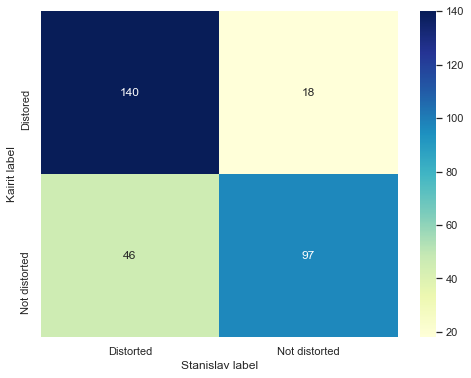

In [22]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(freq_bin, 
                 cmap = "YlGnBu", 
                 annot = True,
                 fmt='g')

ax.set_ylabel('Kairit label')
ax.set_xlabel('Stanislav label')

In [35]:
freq_mult = pd.crosstab(df['Kairit label'], df['Stanislav label'])

In [36]:
freq_mult

Stanislav label,Black and white thinking,Catastrophizing,Disqualifying the positive,Emotional reasoning,Jumping to conclusion,Labeling,Not distorted,Over-generalization,Personalization,Should statement
Kairit label,,,,,,,,,,
Black and white thinking,5,0,1,1,6,1,2,0,0,0
Catastrophizing,1,2,0,0,0,0,0,0,0,0
Disqualifying the positive,2,1,6,0,3,3,2,2,0,1
Emotional reasoning,1,0,2,15,10,1,2,2,1,0
Jumping to conclusion,0,2,1,4,20,0,3,1,0,0
Labeling,0,0,3,0,0,7,1,0,1,0
Not distorted,6,7,8,7,4,5,97,7,2,0
Over-generalization,2,0,0,3,5,1,3,7,2,0
Personalization,0,1,0,0,3,1,1,0,4,0


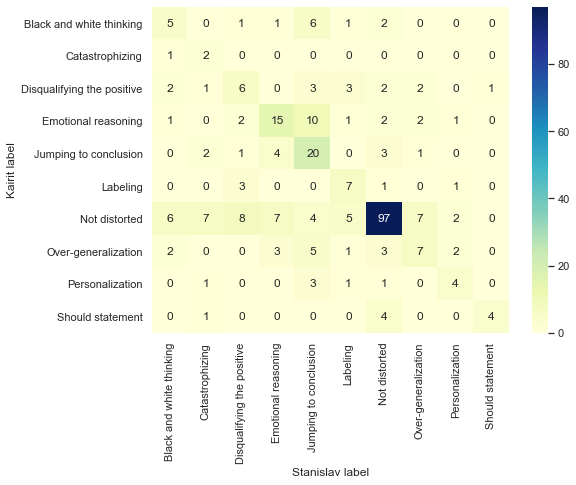

In [37]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(freq_mult, cmap="YlGnBu", annot=True)

In [29]:
temp = df[df['Kairit label'] != 'Not distorted']

In [30]:
temp = temp[temp['Stanislav label'] != 'Not distorted']

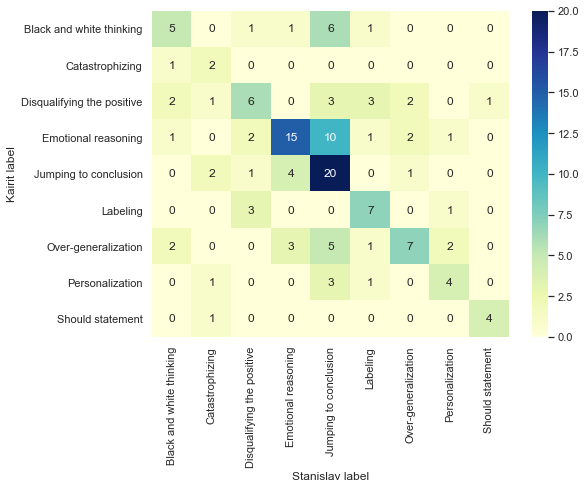

In [31]:
freq_mult_2 = pd.crosstab(temp['Kairit label'], temp['Stanislav label'])
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(freq_mult_2, cmap="YlGnBu", annot=True)